Этот набор данных содержит цены продажи домов в округе Кинг, в который входит Сиэтл. Он включает дома, проданные в период с мая 2014 года по май 2015 года.

Это отличный набор данных для оценки простых регрессионных моделей.

id - Уникальный идентификатор для каждого проданного дома 

дата - Дата продажи дома 

цена - Цена каждого проданного дома 

спальни - Количество спален 

ванные комнаты - Количество ванных комнат, где .5 учитывает комнату с туалетом, но без душа 

sqft_living - Площадь внутренней жилой площади квартиры 

sqft_lot - Площадь земельного участка 

этажи - Количество этажей 

набережная - фиктивная переменная для определения того, выходила ли квартира на набережную или нет 

вид - Индекс от 0 до 4, показывающий, насколько хорош вид из квартиры 

состояние - Индекс от 1 до 5 о состоянии квартиры, 

grade - Индекс от 1 до 13, где 1-3 - низкий уровень строительства и дизайна здания, 7 - средний уровень строительства и дизайна, а 11-13 - высокий уровень качества строительства и дизайна. 

sqft_above - Площадь внутреннего пространства жилья, находящегося над уровнем земли. 

sqft_basement - площадь внутренних помещений, расположенных ниже уровня земли. 

yr_built - Год первоначального строительства дома 

yr_renovated - Год последней реконструкции дома 

zipcode - В каком почтовом индексе находится дом 

lat - широта 

долгота - Долгота 

sqft_living15 - Площадь жилого пространства внутри дома для ближайших 15 соседей 

sqft_lot15 - Площадь земельных участков ближайших 15 соседей 



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn import linear_model
from sklearn import metrics
from scipy import stats
from sklearn.impute import SimpleImputer

In [ ]:
from google.colab import drive
drive.mount ('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
houses_data = pd.read_csv("/content/drive/My Drive/kc_house_data.csv",sep=',', nrows=1000)
houses_data


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7437100570,20140821T000000,291000.0,4,2.50,1860,6325,2.0,0,0,...,7,1860,0,1991,0,98038,47.3492,-122.030,1860,6449
996,8856004730,20140917T000000,199950.0,2,2.75,1590,20917,1.5,0,0,...,5,1590,0,1920,0,98001,47.2786,-122.250,1310,6000
997,3856902996,20140804T000000,553500.0,2,1.00,850,2340,1.0,0,0,...,7,850,0,1922,0,98105,47.6707,-122.328,1300,3000
998,1442800370,20150415T000000,189950.0,2,1.00,1030,4188,1.0,0,0,...,8,1030,0,1981,0,98038,47.3738,-122.057,1450,3376


In [ ]:
imp = SimpleImputer(missing_values = np.NaN, strategy = "most_frequent")

In [ ]:
#удалить дубликаты строк
pd.options.mode.chained_assignment = None

print("Размер данных до удаления")
shapes = houses_data.shape
print("Количество строк: " + str(shapes[0]))

houses_data.drop_duplicates(inplace=True)
print("\n")

print("Размер данных после удаления")
shapes = houses_data.shape
print("Количество строк: " + str(shapes[0]))

Размер данных до удаления
Количество строк: 1000


Размер данных после удаления
Количество строк: 1000


(array([ 38., 280., 279., 202., 105.,  43.,  26.,  19.,   5.,   3.]),
 array([ 380.,  949., 1518., 2087., 2656., 3225., 3794., 4363., 4932.,
        5501., 6070.]),
 <a list of 10 Patch objects>)

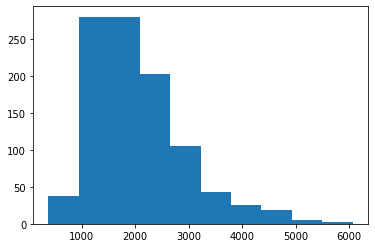

In [ ]:
#масштабирование признаков
plt.hist(houses_data.sqft_living) 

{'boxes': [<matplotlib.lines.Line2D at 0x7f4b12e86c10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4b12937ed0>,
  ...],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4b1293ef10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4b1293e9d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4b12e6c810>,
  ...]}

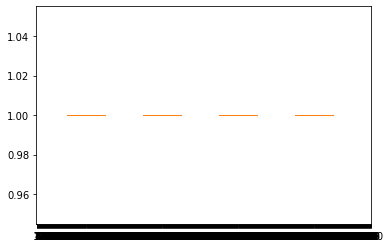

In [ ]:
sqft_living_array = np.asarray(houses_data.sqft_living)
sqft_living_array = sqft_living_array.reshape(-1,1)
sqft_living_normalized = preprocessing.normalize(sqft_living_array)
sqft_living_normalized = sqft_living_normalized.reshape(1,-1)

plt.boxplot(sqft_living_normalized)

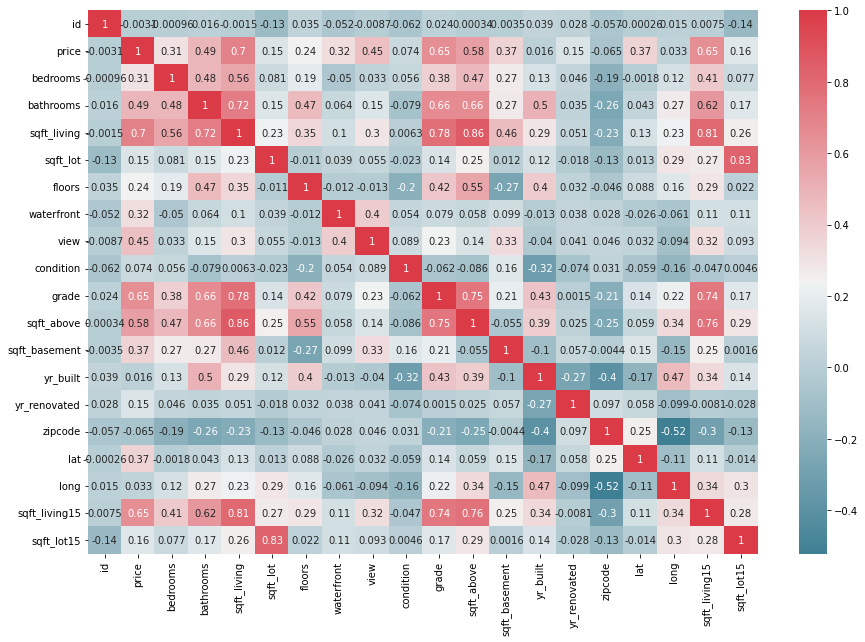

In [ ]:
#корреляция
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(houses_data.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(houses_data)

In [ ]:
#регрессия

In [ ]:
#простая линейная
y = houses_data.price
x = sqft_living_array

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, shuffle=True)

In [ ]:
regression = linear_model.LinearRegression()
regression2 = linear_model.Lasso()

In [ ]:
regression.fit(x_train, y_train)
pred=regression.predict(x_test)

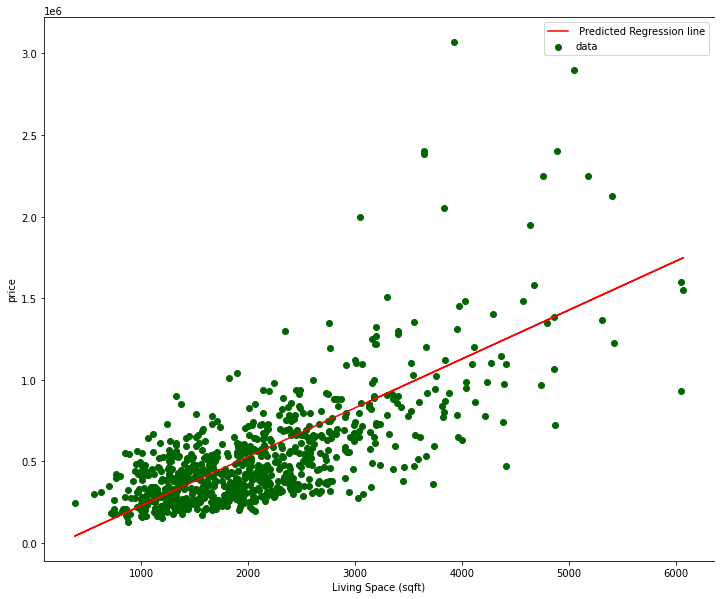

In [ ]:
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(x_test, pred, color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [ ]:
stats.pearsonr(y_test, pred)

(0.705869179830464, 1.2460911588409166e-121)

In [ ]:
stats.spearmanr(y_test,pred)

SpearmanrResult(correlation=0.6371485465229092, pvalue=2.5045845304592135e-92)

In [ ]:
#ЛАССО
regression2.fit(x_train, y_train)
pred2=regression2.predict(x_test)

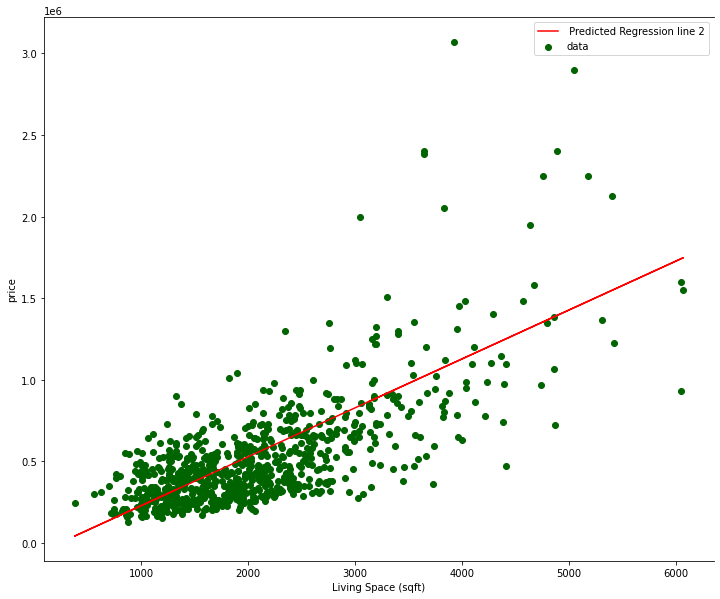

In [ ]:
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(x_test, pred2, color='red', label= ' Predicted Regression line 2')
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [ ]:
stats.pearsonr(y_test, pred2)

(0.7058691798304642, 1.246091158840775e-121)

In [ ]:
stats.spearmanr(y_test, pred2)

SpearmanrResult(correlation=0.6371485465229092, pvalue=2.5045845304592135e-92)